In [793]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_excel(r"C:\Users\david\Desktop\дипломная\код\data\mean_neighbors.xlsx")
prices = pd.read_excel(r"C:\Users\david\Desktop\дипломная\код\data\data_prices.xlsx")

In [ ]:
tickers = pd.read_excel(r"C:\Users\david\Desktop\дипломная\код\data\data_prices.xlsx")

In [39]:
prices.set_index("Date", inplace=True)

In [291]:
#10-летние казначеские облигации начиная с 2015 

treasury = [2.14, 1.84, 2.33, 2.91, 2.14, 0.89, 1.45, 2.95, 3.96]

In [1047]:
#поиск близкой даты 
def get_nearest_date(target_date, date_index):
    #нахожу индекс блиашей даты
    nearest_date_index = date_index.get_loc(target_date, method='nearest')
    return date_index[nearest_date_index]

In [1048]:
#считаю доходности спишки чтобы рассчитать мои возможные макс потери (мой риск)

disribution_sp500 = prices["SP_500"].pct_change(130)
disribution_sp500.dropna(inplace=True)



In [1049]:
my_risk = np.std(disribution_sp500)*1.2

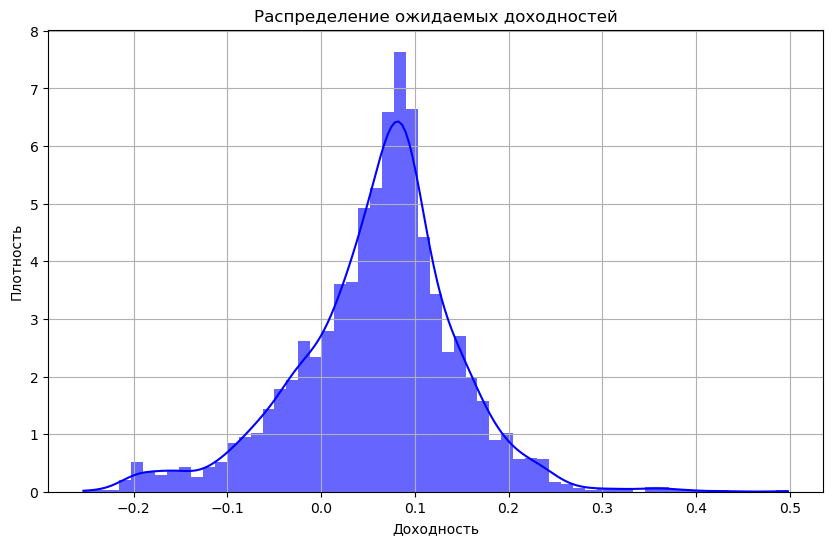

In [1050]:
#график распределения 130 дневных доходностей SP500
plt.figure(figsize=(10, 6)) 
sns.histplot(disribution_sp500, kde=True, stat="density", linewidth=0, color='blue', alpha=0.6)

plt.title('Распределение ожидаемых доходностей')
plt.xlabel('Доходность') 
plt.ylabel('Плотность') 
plt.grid(True)  

plt.show()

In [1051]:
#даты ребалансировки 
data_rebalance = [
                 ("2015-01-10", "2015-06-15"),
                 ("2016-01-10", "2016-06-15"),
                 ("2017-01-10", "2017-06-15"),
                 ("2018-01-10", "2018-06-15"),
                 ("2019-01-10", "2019-06-15"),
                 ("2020-01-10", "2020-06-15"),
                 ("2021-01-10", "2021-06-15"),
                 ("2022-01-10", "2022-06-15"),
                 ("2023-01-10", "2023-06-15")]

#обновляю даты на существющие в prices
new_data_rebalance = []
for start_date, end_date in data_rebalance:
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    #получаю ближайшие даты из индекса prices_1
    nearest_start_date = get_nearest_date(start_date, prices.index)
    nearest_end_date = get_nearest_date(end_date, prices.index)
    #обновляю список
    new_data_rebalance.append((nearest_start_date, nearest_end_date))

C:\Users\david\AppData\Local\Temp\ipykernel_5812\2729678417.py:4: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  nearest_date_index = date_index.get_loc(target_date, method='nearest')


In [1052]:
new_data_rebalance

[(Timestamp('2015-01-09 00:00:00'), Timestamp('2015-06-15 00:00:00')),
 (Timestamp('2016-01-11 00:00:00'), Timestamp('2016-06-15 00:00:00')),
 (Timestamp('2017-01-10 00:00:00'), Timestamp('2017-06-15 00:00:00')),
 (Timestamp('2018-01-10 00:00:00'), Timestamp('2018-06-15 00:00:00')),
 (Timestamp('2019-01-10 00:00:00'), Timestamp('2019-06-14 00:00:00')),
 (Timestamp('2020-01-10 00:00:00'), Timestamp('2020-06-15 00:00:00')),
 (Timestamp('2021-01-11 00:00:00'), Timestamp('2021-06-15 00:00:00')),
 (Timestamp('2022-01-10 00:00:00'), Timestamp('2022-06-15 00:00:00')),
 (Timestamp('2023-01-10 00:00:00'), Timestamp('2023-06-15 00:00:00'))]

# генетический алгоритм 

In [996]:
example_data = df[(df["Year"] == 2015) & (df["Date"] == "2015-01-09")]
example_data

,Year,Company,Date,mean_predict,std_predict,mean_fact
0,2015,CSX,2015-01-09,-0.062805,0.097198,-0.174215
2,2015,TSN,2015-01-09,0.103996,0.151444,0.043420
4,2015,GOOGL,2015-01-09,0.113739,0.092239,0.337738
6,2015,DRI,2015-01-09,0.120561,0.157895,0.180280
8,2015,EXPE,2015-01-09,0.091686,0.156919,0.350691
10,2015,RL,2015-01-09,-0.179378,0.082500,-0.352020
12,2015,WMT,2015-01-09,-0.124042,0.112230,-0.228819
14,2015,DKS,2015-01-09,0.117717,0.115222,-0.059675
16,2015,EPD,2015-01-09,-0.063372,0.105532,-0.181818
18,2015,STZ,2015-01-09,0.045110,0.181897,0.173654


In [997]:
num_assets = len(example_data)
population_size = 1000000

In [998]:
treasury

[2.14, 1.84, 2.33, 2.91, 2.14, 0.89, 1.45, 2.95, 3.96]

In [999]:
#Создаем хромосомы 

# генератор случайных весов генов(активов)
def initialize_portfolio(num_assets):
    weights = np.random.rand(num_assets)
    normalized_weights = weights / np.sum(weights)
    
    return normalized_weights

#функция иницилизации популяции
def initialize_population(num_assets, population_size):
    population = []
    for _ in range(population_size):
        portfolio = initialize_portfolio(num_assets)
        population.append(portfolio)
    return population


In [1000]:
#определяем количество генов в хромосоме
population = initialize_population(num_assets, population_size)



In [1001]:
#фитнесс функция для оценки доходности при заданном риске
#на выходе возвращает portfolio_return
def calculate_fitness(df, weights, my_risk):
    mean_predicts = df['mean_predict'].values
    std_predicts = df['std_predict'].values
    
    portfolio_return = np.dot(weights, mean_predicts)
    portfolio_risk = np.dot(weights, std_predicts)
    
    if portfolio_risk <= my_risk:
        return portfolio_return
    else:
        return -np.inf

In [1002]:
# Отбор родителей - метод 1 : выживают сильнейшие (и немного слабые)

def selection(population, df, my_risk, num_parents):
    # оцениваю каждый хромосоам на приспособленность
    fitness_values = [calculate_fitness(df, chromosome, my_risk) for chromosome in population]
    # выбираю родитилей которые показали лучшие результаты
    selected_indices = np.argsort(fitness_values)[::-1][:num_parents]
    selected_parents = [population[i] for i in selected_indices]
    
    #выбираем 30 процентов значений которые хатим добавить (худшие значения к лучшим) чтобы разнообразить выборку
    percentage_of_weak = round(0.3 * num_parents)
    
    #выбираем рандомно по индексам хромосомы и добавялем к основной выборке
    
    #все индексы кроме уже выбранных
    remaining_indices = [i for i in range(len(population)) if i not in selected_indices]
    
    #рандомно выбираем индексы для "слабых" хромосом
    weak_indices = random.sample(remaining_indices, k=percentage_of_weak)
    
    #добавляю слабых к выбранным родителям
    selected_parents.extend(population[i] for i in weak_indices)
    return selected_parents

In [1003]:
num_parents = 100

In [1004]:
first_method = selection(population, example_data, my_risk, num_parents)

In [1005]:
first_method_population = [calculate_fitness(example_data, i, my_risk) for i in first_method]

#нахожу индексы соответсвующих услвоию значений
valid_indices = [index for index, value in enumerate(first_method_population) if value != -np.inf]
valid_weights  = [first_method[i] for i in valid_indices]

In [1008]:
#скрещивание всех хромосом по одинаковым инедексам

def full_combinatorial_crossover(population):
    num_assets = len(population[0])
    num_chromosomes = len(population)
    
    # список для хранения всех новых хромосом
    new_population = []

    #прохожу по каждой позиции в хромосоме
    for gene_index in range(num_assets):
        #беру все гены хромомосом находящиеся в позиции gene_index
        gene_pool = [chromo[gene_index] for chromo in population]
        #генерирую все комбинации для позиции gene_index во всех хромосомаъ
        
        #прохожу по списку где находятся гены хромосом нахоящиеся в одной позиции
        for gene_value in gene_pool:
            #прохожу по каждой хромосоме
            for base_chromo in population:
                new_chromo = np.array(base_chromo, copy=True)
                #меняю рассматриваемую позицию на каждую
                new_chromo[gene_index] = gene_value
                normalized_new_chromo = new_chromo / np.sum(new_chromo)
                new_population.append(normalized_new_chromo)

    return new_population

In [1009]:
# Поулчаю кросс популяцию
crossover_population = full_combinatorial_crossover(valid_weights)

# Расчет доходности каждых весов
value_crossover_fitness = [calculate_fitness(example_data, i, my_risk) for i in crossover_population]

# Получаю индексы хромосом, которые не -inf, и одновременно отфильтровываю хромосомы и их доходности
valid_indices_cross = [index for index, value in enumerate(value_crossover_fitness) if value != -np.inf]
valid_cross_chromosomes = [crossover_population[i] for i in valid_indices_cross]

valid_value_crossover_population = [value_crossover_fitness[i] for i in valid_indices_cross]

# Получаю индексы хромосом, которые демонстрируют лучшие результаты (топ 30)
top_indices = np.argsort(valid_value_crossover_population)[-30:]

# По полученным индексам беру хромосомы
top_chromosomes = [valid_cross_chromosomes[i] for i in top_indices]

In [1014]:
#АЛГОРИТМ МУТАЦИИ 
def mutate_portfolio_weights(weights, mutation_rate=0.1, mutation_scale=0.05):
    """функция изменяет веса портфеля, случайным образом изменяя веса некоторых активов"""
    new_weights = np.array(weights)
    num_assets = len(weights)
    
    for i in range(num_assets):
        if np.random.rand() < mutation_rate:
            perturbation = np.random.normal(0, mutation_scale * weights[i])
            new_weights[i] += perturbation
    new_weights = np.maximum(new_weights, 0)
    new_weights /= np.sum(new_weights)
    
    return new_weights
        

In [1015]:
top_mutate = []

for i in top_chromosomes:
    chorm = mutate_portfolio_weights(i, mutation_rate=0.1, mutation_scale=0.05)
    top_mutate.append(chorm)

In [1020]:
top_mutate.extend(top_chromosomes)

In [1021]:
top_mutate

[array([0.04046736, 0.00084855, 0.02780204, 0.01936268, 0.03766196,
        0.00337825, 0.01238838, 0.05833735, 0.06904041, 0.00240892,
        0.00531807, 0.00721306, 0.01202758, 0.04177954, 0.02772587,
        0.0030194 , 0.04533929, 0.06085964, 0.01354708, 0.00497246,
        0.04356434, 0.01104264, 0.01611458, 0.07030924, 0.01177467,
        0.07065539, 0.05922229, 0.06785378, 0.00547711, 0.008308  ,
        0.07608054, 0.06609954]),
 array([0.04039454, 0.00084702, 0.02775201, 0.01932784, 0.03759419,
        0.00337217, 0.01236609, 0.05823238, 0.07151824, 0.00242224,
        0.0053085 , 0.00720008, 0.01216318, 0.04170436, 0.02542728,
        0.00301396, 0.04525771, 0.06075013, 0.0135227 , 0.00496351,
        0.04348595, 0.01102277, 0.01697574, 0.07018273, 0.01175348,
        0.07052824, 0.05911572, 0.06773168, 0.00546725, 0.00846101,
        0.07594363, 0.06619367]),
 array([0.04516058, 0.00094696, 0.03102639, 0.02160828, 0.04202983,
        0.00377004, 0.01382513, 0.06510305, 0.03

In [1023]:
acceptable_weights = [weights for weights in top_mutate if calculate_fitness(example_data, weights, my_risk) != -np.inf]


In [1025]:
just_ex = full_combinatorial_crossover(acceptable_weights)

In [1026]:
just_ex_weights = [weights for weights in just_ex if calculate_fitness(example_data, weights, my_risk) != -np.inf]

In [1038]:
sharp = [(np.dot(i, example_data["mean_predict"])-(treasury[1]/100))/ np.dot(i, example_data["mean_predict"]) for i in just_ex_weights]

In [1041]:
sharp.index(max(sharp))

30544

In [1042]:
np.dot(just_ex_weights[30544], example_data["mean_predict"]), np.dot(just_ex_weights[30544], example_data["std_predict"])

(0.06604814934415362, 0.10103797772099277)

In [1043]:
data_calculate = prices[example_data["Company"].values].loc["2015-01-09":"2015-06-15"]

In [1044]:
data_calculate = data_calculate.pct_change(1)
data_calculate

,CSX,TSN,GOOGL,DRI,EXPE,RL,WMT,DKS,EPD,STZ,...,DIS,ANSS,AME,ADI,FDX,WST,HUBB,PH,TECH,UNH
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-12,-0.011281,-0.020869,-0.017592,-0.016375,-0.007270,-0.014224,-0.010629,0.007284,-0.047494,0.004302,...,0.006805,-0.010070,-0.013372,-0.006729,-0.002579,-0.006508,-0.007030,-0.009366,-0.002833,-0.005650
2015-01-13,-0.003218,-0.030731,0.006670,0.003829,-0.017737,0.007043,0.016115,-0.004821,-0.025696,0.002142,...,0.006231,0.002481,-0.018071,0.001282,-0.000747,0.004817,-0.001227,0.008184,0.010599,0.001059
2015-01-14,-0.027884,-0.015086,-0.004278,-0.016252,-0.018406,-0.023198,-0.034692,-0.001677,0.018838,-0.016911,...,-0.013434,-0.013365,-0.020004,-0.023222,-0.022595,-0.002876,-0.013611,-0.037276,0.006379,-0.022417
2015-01-15,0.020833,0.043614,0.016926,0.000169,0.018395,0.005995,-0.007416,-0.019410,0.013559,0.033648,...,0.006489,0.017810,0.007757,0.005242,0.019353,-0.002308,-0.004887,0.008677,-0.016008,0.019191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-09,-0.010499,-0.004635,-0.011263,0.005708,-0.010189,0.001465,-0.009941,-0.009991,0.000000,0.003846,...,-0.006180,-0.016326,0.003717,-0.020169,-0.010829,-0.005409,0.010517,-0.004271,-0.010672,0.004726
2015-06-10,-0.001768,0.009804,0.004196,-0.002454,0.010198,0.000146,0.000138,-0.011400,0.006406,0.003498,...,-0.004115,0.005532,-0.000185,0.000151,0.002167,0.007796,0.004525,0.008578,0.008446,0.000855
2015-06-11,0.004429,0.004854,0.016108,0.031678,0.021228,-0.008485,0.007152,0.013800,-0.002228,0.013280,...,0.010193,0.015383,0.010926,0.025121,0.021903,0.008635,-0.000541,0.005503,0.008577,0.011792


In [1045]:
data_calculate.dropna(inplace=True)

In [1059]:
data_calculate

,CSX,TSN,GOOGL,DRI,EXPE,RL,WMT,DKS,EPD,STZ,...,DIS,ANSS,AME,ADI,FDX,WST,HUBB,PH,TECH,UNH
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-12,-0.011281,-0.020869,-0.017592,-0.016375,-0.007270,-0.014224,-0.010629,0.007284,-0.047494,0.004302,...,0.006805,-0.010070,-0.013372,-0.006729,-0.002579,-0.006508,-0.007030,-0.009366,-0.002833,-0.005650
2015-01-13,-0.003218,-0.030731,0.006670,0.003829,-0.017737,0.007043,0.016115,-0.004821,-0.025696,0.002142,...,0.006231,0.002481,-0.018071,0.001282,-0.000747,0.004817,-0.001227,0.008184,0.010599,0.001059
2015-01-14,-0.027884,-0.015086,-0.004278,-0.016252,-0.018406,-0.023198,-0.034692,-0.001677,0.018838,-0.016911,...,-0.013434,-0.013365,-0.020004,-0.023222,-0.022595,-0.002876,-0.013611,-0.037276,0.006379,-0.022417
2015-01-15,0.020833,0.043614,0.016926,0.000169,0.018395,0.005995,-0.007416,-0.019410,0.013559,0.033648,...,0.006489,0.017810,0.007757,0.005242,0.019353,-0.002308,-0.004887,0.008677,-0.016008,0.019191
2015-01-16,0.010352,-0.002488,-0.011279,-0.011630,-0.037292,-0.018862,0.002299,0.010849,0.045303,-0.010882,...,-0.006448,-0.003327,-0.025116,-0.023091,-0.002481,-0.028335,0.007896,-0.028161,0.016050,0.009077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-09,-0.010499,-0.004635,-0.011263,0.005708,-0.010189,0.001465,-0.009941,-0.009991,0.000000,0.003846,...,-0.006180,-0.016326,0.003717,-0.020169,-0.010829,-0.005409,0.010517,-0.004271,-0.010672,0.004726
2015-06-10,-0.001768,0.009804,0.004196,-0.002454,0.010198,0.000146,0.000138,-0.011400,0.006406,0.003498,...,-0.004115,0.005532,-0.000185,0.000151,0.002167,0.007796,0.004525,0.008578,0.008446,0.000855
2015-06-11,0.004429,0.004854,0.016108,0.031678,0.021228,-0.008485,0.007152,0.013800,-0.002228,0.013280,...,0.010193,0.015383,0.010926,0.025121,0.021903,0.008635,-0.000541,0.005503,0.008577,0.011792


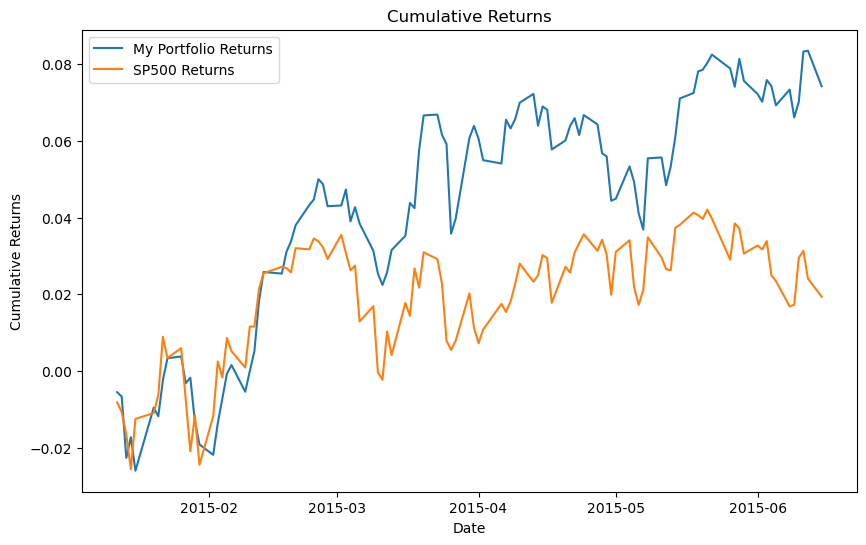

In [1046]:
weighted_returns = data_calculate.multiply(just_ex_weights[30544], axis='columns')
portfolio_daily_returns = weighted_returns.sum(axis=1)

SP = prices["SP_500"].loc["2015-01-09":"2015-06-15"]
SP_return = SP.pct_change(1)
SP_return.dropna(inplace=True)
my = calculate_cumulative_returns(portfolio_daily_returns.values)

indexxx = calculate_cumulative_returns(SP_return.values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(portfolio_daily_returns.index, my,  label='My Portfolio Returns')
plt.plot(portfolio_daily_returns.index, indexxx, label='SP500 Returns')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

In [ ]:
#поиск градиента

In [941]:
def fitness_function_grad(df, weights, max_risk):
    
    """рассчитать пригодность данного портфеля на основе весов"""
    weights = np.array(weights) / np.sum(weights)
    
    mean_predicts = df['mean_predict'].values
    std_predicts = df['std_predict'].values
    
    
    portfolio_return = np.dot(weights, mean_predicts)
    portfolio_risk = np.dot(weights, std_predicts)
    
    if portfolio_risk > max_risk:
        penalty = (portfolio_risk - max_risk) ** 2
    else:
        penalty = 0
    return portfolio_return - penalty

In [942]:
def numerical_gradient(df, weights, max_risk, epsilon=1e-8):
    """расчет градиента с использованием метода конечных разностей"""
    grad = np.zeros_like(weights)
    n = len(weights)
    for i in range(n):
        #создаю векторы весов для шагов вперед и назад
        weights_plus = np.array(weights, dtype=float)
        weights_minus = np.array(weights, dtype=float)
        
        #увеличиваю и уменьшаю веса на эпсилон
        weights_plus[i] += epsilon
        weights_minus[i] -= epsilon
        
        #нормализую веса
        weights_plus /= np.sum(weights_plus)
        weights_minus /= np.sum(weights_minus)
        
        #расчет фитнесс для двух векторов
        f_plus = fitness_function_grad(df, weights_plus, max_risk)
        f_minus = fitness_function_grad(df, weights_minus, max_risk)
        
        #расчет градиента
        grad[i] = (f_plus - f_minus) / (2 * epsilon)
        
    return grad
    

In [956]:
def gradient_ascent(df, initial_weights, max_risk, alpha=0.01, max_iter=10000):
    all_weights = []
    risk_all = []
    weights = np.array(initial_weights)
    for _ in range(max_iter):
        grad = numerical_gradient(df, weights, max_risk)
        
        weights += alpha * grad
        
        weights = np.maximum(weights, 0)
        weights /= np.sum(weights)
        all_weights.append(fitness_function_grad(df, weights, max_risk))
        risk_all.append(np.dot(weights, df["std_predict"].values))
        
    return weights, all_weights, risk_all

In [708]:
data_calculate = prices[example_data["Company"].values].loc["2015-01-09":"2015-06-15"]

In [709]:
data_calculate = data_calculate.pct_change(1)
data_calculate

,PG,CSL,A,SWK,ENTG,TXRH,EXPE,TRMB,TFX,ODFL,...,CSX,XYL,SCHW,WTRG,SCCO,DLTR,STZ,LKQ,CMCSA,ISRG
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-12,-0.007677,0.001388,-0.009512,-0.009727,-0.013567,-0.011178,-0.007270,-0.000782,-0.003751,-0.022190,...,-0.011281,-0.021770,-0.033288,-0.006769,-0.017266,-0.021972,0.004302,-0.009393,-0.006536,-0.015330
2015-01-13,0.003316,0.003412,-0.003447,0.001267,-0.004854,0.010725,-0.017737,0.012124,-0.005020,-0.005403,...,-0.003218,0.002312,0.003162,0.007194,-0.048046,0.009649,0.002142,-0.013129,0.010669,0.017539
2015-01-14,-0.011566,-0.006057,-0.035582,-0.029219,-0.008130,-0.012332,-0.018406,-0.012365,-0.003874,-0.014125,...,-0.027884,-0.006344,-0.038179,0.006391,-0.037288,-0.040650,-0.016911,-0.029933,-0.017593,-0.020094
2015-01-15,0.008470,-0.010049,0.007686,0.024666,-0.015574,-0.022358,0.018395,-0.006260,0.004070,0.012536,...,0.020833,-0.006965,-0.007647,-0.001868,0.004695,0.003717,0.033648,-0.001143,0.003044,0.026491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-09,0.006324,-0.005574,-0.008197,0.001449,0.000701,-0.004651,-0.010189,-0.001294,0.000229,-0.010701,...,-0.010499,-0.001107,-0.005127,-0.005467,0.004299,-0.006452,0.003846,-0.011868,-0.016871,-0.013087
2015-06-10,0.016160,0.015114,0.011771,0.006174,0.020322,0.011545,0.010198,-0.002591,0.004507,-0.008076,...,-0.001768,0.011634,0.006062,-0.001570,0.011195,0.005325,0.003498,0.001373,0.005374,0.016979
2015-06-11,0.008835,0.007296,0.004208,0.023778,-0.006181,-0.004076,0.021228,0.007359,0.003879,0.014248,...,0.004429,0.010679,0.007834,0.007078,-0.008141,0.015631,0.013280,0.005826,0.004828,0.009322


In [710]:
data_calculate.dropna(inplace=True)

In [711]:
data_calculate

,PG,CSL,A,SWK,ENTG,TXRH,EXPE,TRMB,TFX,ODFL,...,CSX,XYL,SCHW,WTRG,SCCO,DLTR,STZ,LKQ,CMCSA,ISRG
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-12,-0.007677,0.001388,-0.009512,-0.009727,-0.013567,-0.011178,-0.007270,-0.000782,-0.003751,-0.022190,...,-0.011281,-0.021770,-0.033288,-0.006769,-0.017266,-0.021972,0.004302,-0.009393,-0.006536,-0.015330
2015-01-13,0.003316,0.003412,-0.003447,0.001267,-0.004854,0.010725,-0.017737,0.012124,-0.005020,-0.005403,...,-0.003218,0.002312,0.003162,0.007194,-0.048046,0.009649,0.002142,-0.013129,0.010669,0.017539
2015-01-14,-0.011566,-0.006057,-0.035582,-0.029219,-0.008130,-0.012332,-0.018406,-0.012365,-0.003874,-0.014125,...,-0.027884,-0.006344,-0.038179,0.006391,-0.037288,-0.040650,-0.016911,-0.029933,-0.017593,-0.020094
2015-01-15,0.008470,-0.010049,0.007686,0.024666,-0.015574,-0.022358,0.018395,-0.006260,0.004070,0.012536,...,0.020833,-0.006965,-0.007647,-0.001868,0.004695,0.003717,0.033648,-0.001143,0.003044,0.026491
2015-01-16,-0.005968,-0.001512,-0.038139,-0.027147,0.028310,0.011880,-0.037292,-0.030315,-0.009188,-0.018367,...,0.010352,0.007306,-0.015780,0.017964,0.054907,-0.022367,-0.010882,-0.034706,-0.003571,-0.022724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-09,0.006324,-0.005574,-0.008197,0.001449,0.000701,-0.004651,-0.010189,-0.001294,0.000229,-0.010701,...,-0.010499,-0.001107,-0.005127,-0.005467,0.004299,-0.006452,0.003846,-0.011868,-0.016871,-0.013087
2015-06-10,0.016160,0.015114,0.011771,0.006174,0.020322,0.011545,0.010198,-0.002591,0.004507,-0.008076,...,-0.001768,0.011634,0.006062,-0.001570,0.011195,0.005325,0.003498,0.001373,0.005374,0.016979
2015-06-11,0.008835,0.007296,0.004208,0.023778,-0.006181,-0.004076,0.021228,0.007359,0.003879,0.014248,...,0.004429,0.010679,0.007834,0.007078,-0.008141,0.015631,0.013280,0.005826,0.004828,0.009322


In [677]:
portfolio_weights = best_of_the_best[best_index]

In [678]:
portfolio_weights

array([0.08197311, 0.01298137, 0.00697663, 0.03614697, 0.06499471,
       0.        , 0.        , 0.03023329, 0.        , 0.02361968,
       0.        , 0.01690743, 0.0182305 , 0.0339308 , 0.        ,
       0.        , 0.06992974, 0.06163545, 0.00736493, 0.00643664,
       0.00323946, 0.01909004, 0.00841792, 0.0623077 , 0.04346738,
       0.0850792 , 0.03826614, 0.08015363, 0.00514106, 0.02699468,
       0.06279054, 0.09369103])

In [679]:
weighted_returns = data_calculate.multiply(portfolio_weights, axis='columns')
portfolio_daily_returns = weighted_returns.sum(axis=1)
SP = prices["SP_500"].loc["2015-01-09":"2015-06-15"]
SP_return = SP.pct_change(1)
SP_return.dropna(inplace=True)
my = calculate_cumulative_returns(portfolio_daily_returns.values)

indexxx = calculate_cumulative_returns(SP_return.values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(portfolio_daily_returns.index, my,  label='My Portfolio Returns')
plt.plot(portfolio_daily_returns.index, indexxx, label='SP500 Returns')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

In [682]:
SP = prices["SP_500"].loc["2015-01-09":"2015-06-15"]

In [683]:
SP_return = SP.pct_change(1)


In [684]:
SP_return.dropna(inplace=True)

In [685]:
SP_return

Date
2015-01-12   -0.008094
2015-01-13   -0.002579
2015-01-14   -0.005813
2015-01-15   -0.009248
2015-01-16    0.013424
                ...   
2015-06-09    0.000418
2015-06-10    0.012042
2015-06-11    0.001739
2015-06-12   -0.006994
2015-06-15   -0.004623
Name: SP_500, Length: 107, dtype: float64

In [686]:
portfolio_daily_returns

Date
2015-01-12   -0.006858
2015-01-13   -0.002158
2015-01-14   -0.017670
2015-01-15    0.009693
2015-01-16   -0.011788
                ...   
2015-06-09   -0.005952
2015-06-10    0.004228
2015-06-11    0.012900
2015-06-12   -0.000224
2015-06-15   -0.008462
Length: 107, dtype: float64

In [1035]:
def calculate_cumulative_returns(daily_returns):
    """
    функция для расчета кумулятивной доходности дневных доходностей

    """
    daily_returns = np.array(daily_returns)
    cumulative_returns = (1 + daily_returns).cumprod() - 1
    return cumulative_returns.tolist()

In [687]:
my = calculate_cumulative_returns(portfolio_daily_returns.values)

In [688]:
indexxx = calculate_cumulative_returns(SP_return.values)

In [ ]:



#визуализация

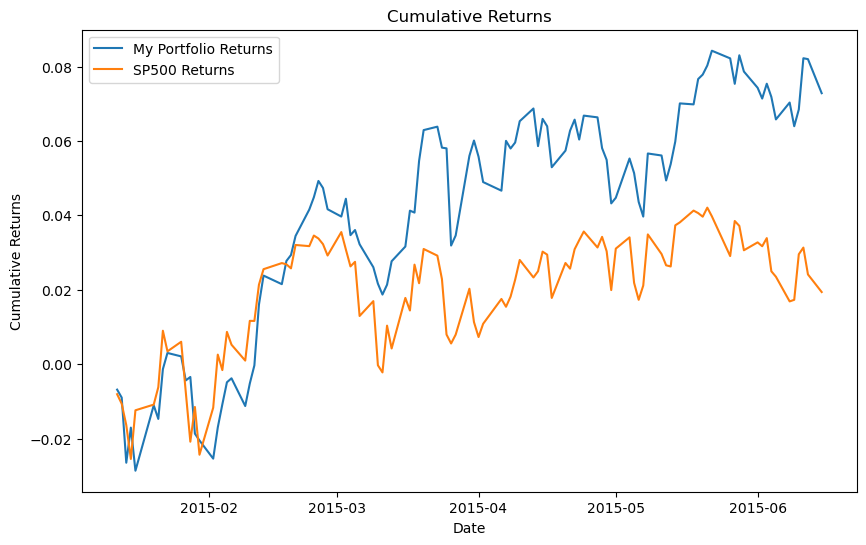

In [689]:

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(portfolio_daily_returns.index, my,  label='My Portfolio Returns')
plt.plot(portfolio_daily_returns.index, indexxx, label='SP500 Returns')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()